In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', index_col=0)

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.shape

(15000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Handling Null Values 

In [7]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

### Handling Outliers

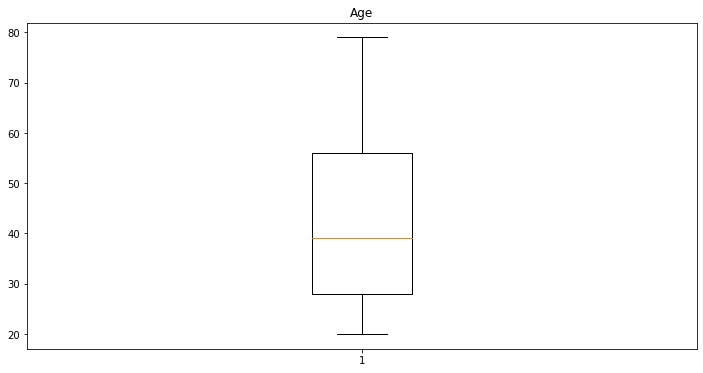

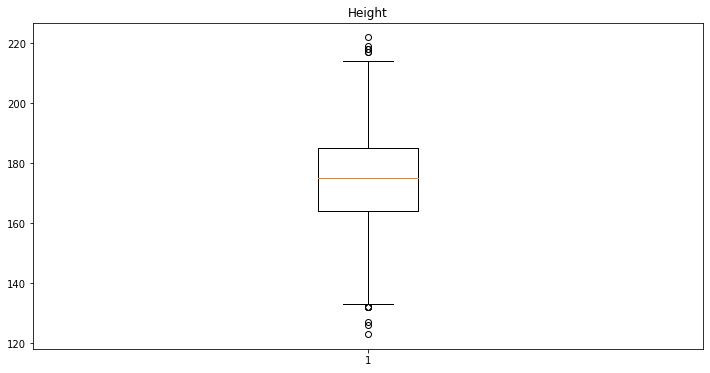

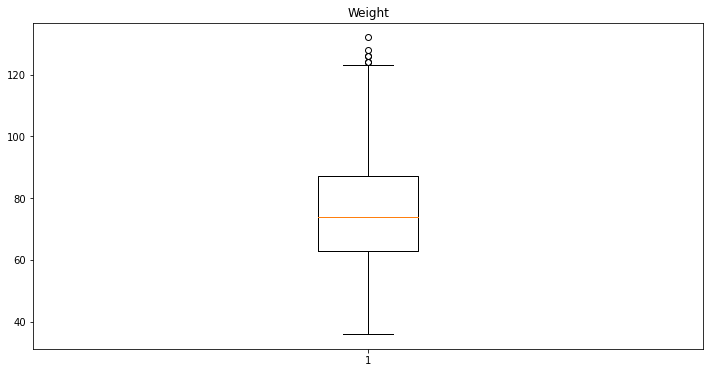

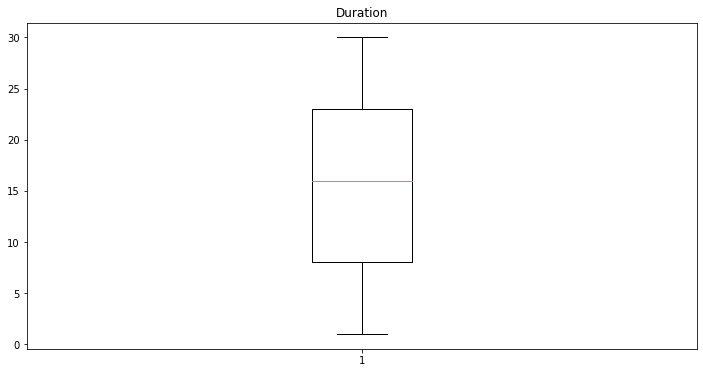

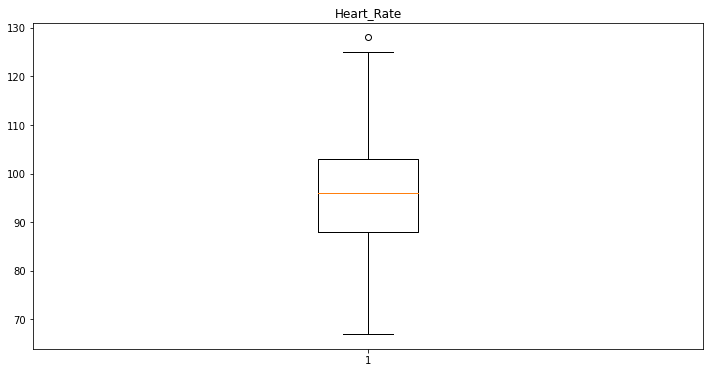

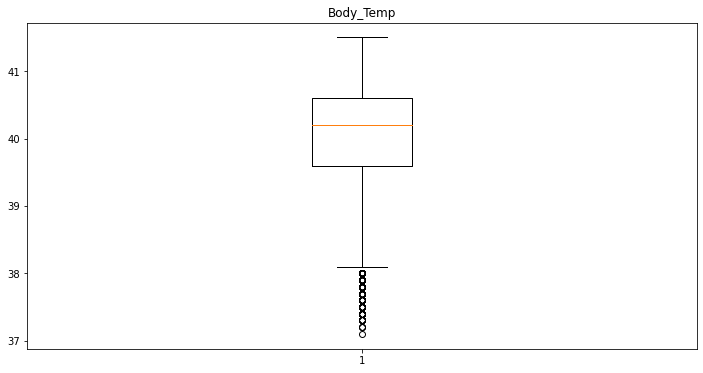

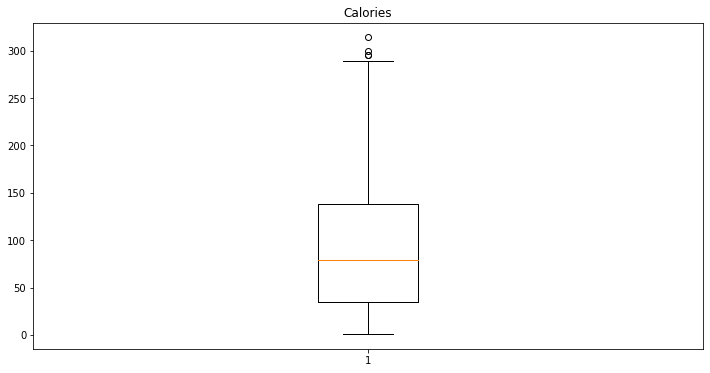

In [9]:
for i in ['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp', 'Calories']:
    plt.figure(figsize=(12,6))
    plt.boxplot(x=df[i])
    plt.title(i)

Finding Lower And Upper bound using emperical formula for those column which is NormalyDistributed and using IQR(Inter Quartile Range) for those column which are skewed.

In [10]:
ub_height = df['Height'].mean()+3*df['Height'].std()
lb_height = df['Height'].mean()-3*df['Height'].std()

In [11]:
print(f"Lower bound of height :{lb_height} and Upper bound of height :{ub_height}")

Lower bound of height :131.69079248367973 and Upper bound of height :217.23947418298695


In [12]:
ub_weight = df['Weight'].mean()+3*df['Weight'].std()
lb_weight = df['Weight'].mean()-3*df['Weight'].std()

In [13]:
print(f"Lower bound of height :{lb_weight} and Upper bound of height :{ub_weight}")

Lower bound of height :29.85989644892581 and Upper bound of height :120.07383688440751


In [14]:
IQR = df['Body_Temp'].quantile(0.75)-df['Body_Temp'].quantile(0.25)
lb_bodytemp = df['Body_Temp'].quantile(0.25)-(IQR*1.5)
ub_bodytemp = df['Body_Temp'].quantile(0.75)+(IQR*1.5)
print(f"IQR :{IQR}, Lower bound :{lb_bodytemp}, Upper bound :{ub_bodytemp}")

IQR :1.0, Lower bound :38.1, Upper bound :42.1


In [15]:
IQR_Calories = df['Calories'].quantile(0.75)-df['Calories'].quantile(0.25)
lb_bodytemp = df['Calories'].quantile(0.25)-(IQR*3)
ub_bodytemp = df['Calories'].quantile(0.75)+(IQR*3)
print(f"IQR :{IQR_Calories}, Lower bound :{lb_bodytemp}, Upper bound :{ub_bodytemp}")

IQR :103.0, Lower bound :32.0, Upper bound :141.0


Removing Outliers

In [16]:
height_outliers_index_lb = df[df['Height']<132].index
height_outliers_index_ub = df[df['Height']>217].index

In [17]:
weight_outliers_index_ub = df[df['Weight']>120].index

In [18]:
bodytemp_outliers_index_lb = df[df['Body_Temp']<38].index

In [19]:
calories_outliers_index_ub = df[df['Calories']>280].index

In [20]:
print(f"Total Outliers in Height column:{len(height_outliers_index_lb) + len(height_outliers_index_ub)}, Weight Column: {len(weight_outliers_index_ub)}, Body Temp Column: {len(bodytemp_outliers_index_lb)}, Calories column: {len(calories_outliers_index_ub)}")

Total Outliers in Height column:7, Weight Column: 13, Body Temp Column: 281, Calories column: 6


In [21]:
indexes = []
for i in [height_outliers_index_lb,height_outliers_index_ub,weight_outliers_index_ub,bodytemp_outliers_index_lb,calories_outliers_index_ub]:
    for j in i:
        if j not in indexes:
            indexes.append(j)

In [22]:
for index in indexes:
    df.drop(index=index, axis=0, inplace=True)


In [23]:
df.shape

(14697, 9)

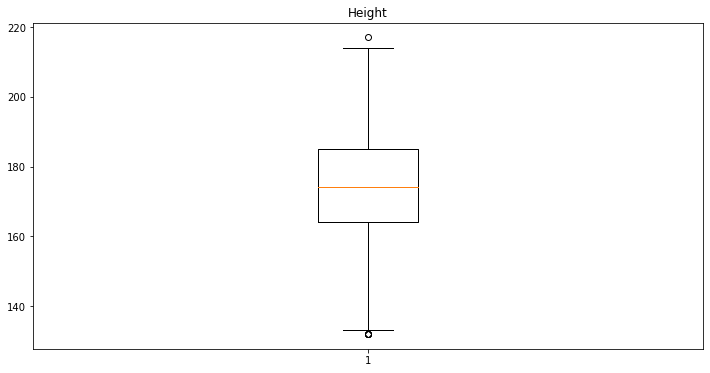

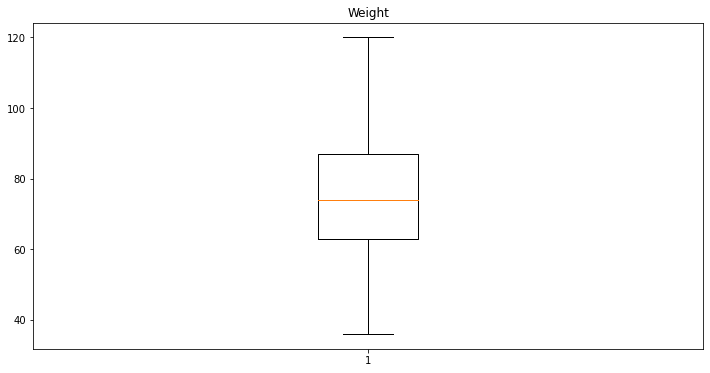

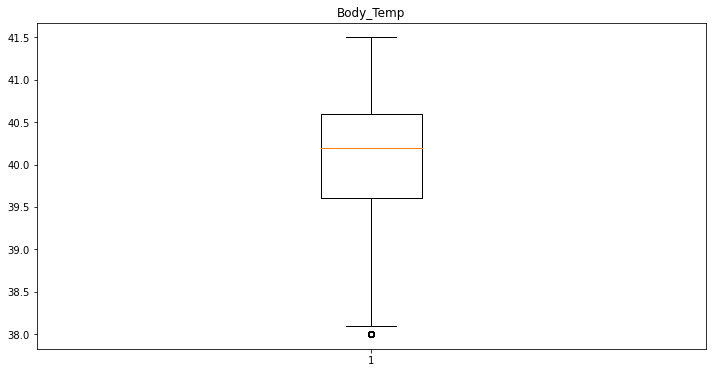

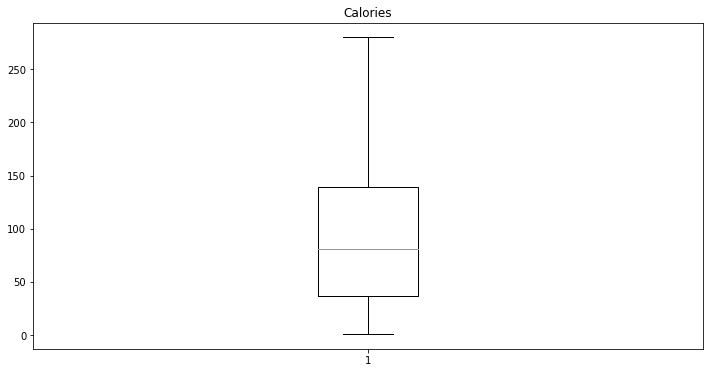

In [24]:
for i in ['Height', 'Weight','Body_Temp', 'Calories']:
    plt.figure(figsize=(12,6))
    plt.boxplot(x=df[i])
    plt.title(i)

### Handling Categorical Values 

In [25]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [27]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [28]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [29]:
df.to_csv('featured_data.csv')